# Multiclass  classification on Stanford Dog Breeds dataset

### 1. define the problem and assemble the dataset

In this project, we will tackle a multi-class classification problem using the Stanford Dogs dataset. This dataset contains images of 120 breeds of dogs from around the world, where we have unbalanced number of image data for each class. However, the dataset are not extremely imbalanced, the number of images per class range between 150 to 200. There are 20580 images of different sizes in total. This dataset has been built using images and annotation from ImageNet for the task of fine-grained image categorization. It was originally collected for fine-grain image categorization, a challenging problem as certain dog breeds have near identical features or differ in color and age.


### 2. Choose a measure of success

My model will take an accuracy score and as a measure of success.

### 3. Decide on an evaluation protocol

We will use a hold out validation method to split the training and validation set. Since we have our dataset directly downloaded from kaggle, we considered that it would be easoer for us to split our data directly within the image directory. We are using a 7:1.5:1.5 split for the training, testing and validation split. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from keras import optimizers
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from keras import layers 
from keras import models
import cv2 # OpenCV module that handles computer vision methods

%matplotlib inline

In [ ]:
# libraries for a CNN
import tensorflow as tf
from tensorflow import keras


from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense

In [ ]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras import backend as K
from sklearn.model_selection import train_test_split
from keras.utils.vis_utils import plot_model
import imageio
from sklearn.model_selection import train_test_split
from keras.utils.vis_utils import plot_model

In [ ]:
import os, shutil

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


get the train and test data

In [ ]:
ANNOTATION_DIR = '/content/drive/My Drive/CSC 375 Final Project/Annotation/' 
IMAGES_DIR ='/content/drive/My Drive/CSC 375 Final Project/Images/'

In [ ]:
base_dir = '/content/drive/My Drive/CSC 375 Final Project/30_Classes_Separated_Data'

os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train') 
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation') 
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test') 
os.mkdir(test_dir)

Take a look at all breeds

In [ ]:
import glob
breed_list = glob.glob(IMAGES_DIR+'n*')
print("num of breeds total:", len(breed_list))

num of breeds total: 0


Take a look at one sample picture.

In [ ]:
print(breed_list[0][53:])

n02112018-Pomeranian


Get the train and test data

In [ ]:
for i in range(30):
    train_class_dir = os.path.join(train_dir, breed_list[i][53:]) 
    os.mkdir(train_class_dir)
    
    test_class_dir = os.path.join(test_dir, breed_list[i][53:]) 
    os.mkdir(test_class_dir)
    
    val_class_dir = os.path.join(validation_dir, breed_list[i][53:]) 
    os.mkdir(val_class_dir)

In [ ]:
for i in range(30):
    img_dir = breed_list[i]
    listing = glob.glob(img_dir+'/*.jpg')
    
    num_train = int(len(listing)*0.7)
    reminder_images = len(listing)-num_train
    num_test = int(reminder_images*0.5)
    reminder = reminder_images - num_test
    num_val = int(reminder)
    
    #print(str(len(listing)), str(num_train+num_test+num_val))
    
    for j in range(0,num_train):
        src = listing[j]
        train_class_dir = os.path.join(train_dir, breed_list[i][53:])     
        dst = os.path.join(train_class_dir,os.path.basename(listing[j])) 
        shutil.copyfile(src, dst)
    
    for j in range(num_train,num_test+num_train):
        src = listing[j]
        test_class_dir = os.path.join(test_dir, breed_list[i][53:])     
        dst = os.path.join(test_class_dir,os.path.basename(listing[j])) 
        shutil.copyfile(src, dst)
    
    for j in range(num_train+num_test,num_train+num_test+num_val):
        src = listing[j]
        val_class_dir = os.path.join(validation_dir, breed_list[i][53:])     
        dst = os.path.join(val_class_dir,os.path.basename(listing[j])) 
        shutil.copyfile(src, dst)

We would like to split the images into a train, test and validation dataset, where 70% of the data will become the training data, 15% will be the validation data and 15% will be our test data. 

In [ ]:
base_dir = '/content/drive/My Drive/CSC 375 Final Project/Data'
## base_dir ='/Users/coco/Downloads/Data/' 
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train') 
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation') 
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test') 
os.mkdir(test_dir)

In [ ]:
import glob
breed_list = glob.glob(IMAGES_DIR+'n*')
print("num of breeds total:", len(breed_list))

num of breeds total: 120


In [ ]:
# insight on how many images are stored in each class
sum = 0
for i in range(120):
    img_dir = breed_list[i]
    listing = glob.glob(img_dir+'/*.jpg')
    print("class", i+1, "contains", len(listing), "images")
    sum += len(listing)
print(sum)

class 1 contains 219 images
class 2 contains 159 images
class 3 contains 156 images
class 4 contains 153 images
class 5 contains 210 images
class 6 contains 164 images
class 7 contains 150 images
class 8 contains 150 images
class 9 contains 151 images
class 10 contains 159 images
class 11 contains 159 images
class 12 contains 151 images
class 13 contains 156 images
class 14 contains 213 images
class 15 contains 150 images
class 16 contains 182 images
class 17 contains 152 images
class 18 contains 151 images
class 19 contains 150 images
class 20 contains 239 images
class 21 contains 218 images
class 22 contains 156 images
class 23 contains 158 images
class 24 contains 209 images
class 25 contains 195 images
class 26 contains 202 images
class 27 contains 180 images
class 28 contains 187 images
class 29 contains 155 images
class 30 contains 182 images
class 31 contains 172 images
class 32 contains 195 images
class 33 contains 153 images
class 34 contains 196 images
class 35 contains 186 i

We have a somewhat unbalanced dataset, but it is not extremely unbalanced. The number of images we have for each class range between 150 to 200. 

In [ ]:
# visualize breeds
filtered_breeds = [breed.split('-',1)[-1] for breed in breed_list] 
filtered_breeds[:120]

['Pomeranian',
 'black-and-tan_coonhound',
 'soft-coated_wheaten_terrier',
 'Brabancon_griffon',
 'Leonberg',
 'Yorkshire_terrier',
 'groenendael',
 'Irish_water_spaniel',
 'curly-coated_retriever',
 'French_bulldog',
 'English_springer',
 'toy_poodle',
 'dingo',
 'Great_Pyrenees',
 'Welsh_springer_spaniel',
 'Boston_bull',
 'Brittany_spaniel',
 'Appenzeller',
 'clumber',
 'Afghan_hound',
 'Samoyed',
 'Great_Dane',
 'keeshond',
 'basenji',
 'beagle',
 'Airedale',
 'Dandie_Dinmont',
 'bloodhound',
 'Irish_setter',
 'Bedlington_terrier',
 'toy_terrier',
 'Newfoundland',
 'collie',
 'Australian_terrier',
 'Lhasa',
 'Walker_hound',
 'Rottweiler',
 'Shetland_sheepdog',
 'cairn',
 'African_hunting_dog',
 'whippet',
 'otterhound',
 'Sussex_spaniel',
 'Shih-Tzu',
 'Labrador_retriever',
 'English_setter',
 'Scotch_terrier',
 'affenpinscher',
 'flat-coated_retriever',
 'Italian_greyhound',
 'chow',
 'Weimaraner',
 'Rhodesian_ridgeback',
 'vizsla',
 'pug',
 'boxer',
 'Old_English_sheepdog',
 'kel

In [ ]:
print(breed_list[0][53:])

n02112018-Pomeranian


In [ ]:
i = 0
for breed in breed_list:
    train_class_dir = os.path.join(train_dir, breed_list[i][53:]) 
    os.mkdir(train_class_dir)
    
    test_class_dir = os.path.join(test_dir, breed_list[i][53:]) 
    os.mkdir(test_class_dir)
    
    val_class_dir = os.path.join(validation_dir, breed_list[i][53:]) 
    os.mkdir(val_class_dir)
    
    i = i+1

In [ ]:
print(breed_list[0])

/content/drive/My Drive/CSC 375 Final Project/Images/n02112018-Pomeranian


In [ ]:
#fnames = ['cat.{}.jpg'.format(i) for i in range(1000)] 
#for fname in fnames:
 #   src = os.path.join(original_dataset_dir, fname) 
  #  dst = os.path.join(train_cats_dir, fname) 
   # shutil.copyfile(src, dst)
    
for i in range(120):
    img_dir = breed_list[i]
    listing = glob.glob(img_dir+'/*.jpg')
    
    num_train = int(len(listing)*0.7)
    reminder_images = len(listing)-num_train
    num_test = int(reminder_images*0.5)
    reminder = reminder_images - num_test
    num_val = int(reminder)
    
    #print(str(len(listing)), str(num_train+num_test+num_val))
    
    for j in range(0,num_train):
        src = listing[j]
        train_class_dir = os.path.join(train_dir, breed_list[i][53:])     
        dst = os.path.join(train_class_dir,os.path.basename(listing[j])) 
        shutil.copyfile(src, dst)
    
    for j in range(0,num_test):
        src = listing[j]
        test_class_dir = os.path.join(test_dir, breed_list[i][53:])     
        dst = os.path.join(test_class_dir,os.path.basename(listing[j])) 
        shutil.copyfile(src, dst)
    
    for j in range(0,num_val):
        src = listing[j]
        val_class_dir = os.path.join(validation_dir, breed_list[i][53:])     
        dst = os.path.join(val_class_dir,os.path.basename(listing[j])) 
        shutil.copyfile(src, dst)
        

In [ ]:
# sanity check
print('total training breeds images:', len(os.listdir(train_class_dir)))
print('total testing breeds images:', len(os.listdir(test_class_dir)))
print('total validation breeds images:', len(os.listdir(val_class_dir)))

n02102973-Irish_water_spaniel


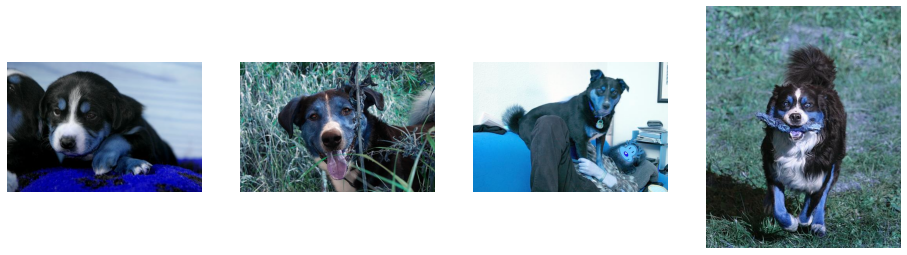

In [ ]:
def show_dir_images(breed, n_to_show):
    plt.figure(figsize=(16,16))
    img_dir = "/content/drive/My Drive/CSC 375 Final Project/Images/{}/".format(breed)
    images = os.listdir(img_dir)[:n_to_show]
    for i in range(n_to_show):
        img = cv2.imread(img_dir + images[i])
        plt.subplot(n_to_show/4+1, 4, i+1)
        plt.imshow(img)
        plt.axis('off')



print(breed_list[11])
show_dir_images(breed_list[0], 4)

### 4. prepare the data

In [ ]:
image_path = '/content/drive/My Drive/CSC 375 Final Project/Images/'
train_dir = '/content/drive/My Drive/CSC 375 Final Project/30_Classes_Separated_Data/train'
test_dir = '/content/drive/My Drive/CSC 375 Final Project/30_Classes_Separated_Data/test'
validation_dir = '/content/drive/My Drive/CSC 375 Final Project/30_Classes_Separated_Data/validation'

num_of_categories = 30
image_size = 192
batch_size = 16

We will use the module built inside Keras with image processing helper tools -- `keras.preprocessing.image`. It contains the class `ImageDataGenerator` which allows to quickly set up Python generators that can automatically turn image files on disk into batches of pre-processed tensors. This is what we will use here.

In [ ]:
def image_preprocess(image):
    image = tf.image.per_image_standardization(image)
    return image

def image_datagen_load():
    train_datagen = keras.preprocessing.image.ImageDataGenerator(
        #rotation_range=30, 
        #width_shift_range=0.2, 
        #zca_whitening=True, 
        #shear_range=0.2,
        #height_shift_range=0.2, 
        #brightness_range=[0.9,1.1], 
        #zoom_range=0.1, 
        #fill_mode='constant', 
        #cval=0.0, 
        #horizontal_flip=True, 
        # All images will be rescaled by 1/255.
        rescale=1/255., 
        preprocessing_function=None,
        dtype='float32')
    
    test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)


    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size), 
        color_mode='rgb', 
        classes=None, 
        interpolation='hamming',
        class_mode='categorical', 
        batch_size=batch_size,
        shuffle=True)

    validation_generator = test_datagen.flow_from_directory(
        validation_dir, 
        target_size=(image_size, image_size), 
        color_mode='rgb', 
        classes=None, 
        interpolation='hamming',
        class_mode='categorical', 
        batch_size=batch_size, 
        shuffle=False)

    return train_generator, validation_generator

In [ ]:
train_generator, validation_generator = image_datagen_load()

Found 14458 images belonging to 120 classes.
Found 3166 images belonging to 120 classes.


In [ ]:
# sanity check
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
    
for data_batch, labels_batch in validation_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (16, 192, 192, 3)
labels batch shape: (16, 120)
data batch shape: (16, 192, 192, 3)
labels batch shape: (16, 120)


Let's take a look at the output of one of these generators: it yields batches of RGB images (shape `(16, 192, 192, 3)`) and 
    labels of shape `(16,120)`. 16 is the number of samples in each batch (the batch size), and 120 corresponds to 120 classes.

### 5. Develop a model that is better than the baseline

Since we have 120 classes, the baseline accuracy should be 0.012. Since we are just building a very simple model, we just want to assure that this model converges and the accuracy is greater than 0.012. Thus, we will only identify one convolution layer and one maxpooling layer. Also, we will only add one hidden layer in my dense neural network structure.

In [ ]:
# train from baseline
from keras import layers 
from keras import models

# build the network (convolution layer)
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(192, 192, 3))) 
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))

'''
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
'''

# build the network (dense layer)
model.add(layers.Flatten()) 
#model.add(layers.Dense(256, activation='relu')) 
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(120, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 190, 190, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 95, 95, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 93, 93, 64)        9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 46, 46, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 135424)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                8667200   
_________________________________________________________________
dense_1 (Dense)              (None, 120)               7

In [ ]:
# compile the model for training
# use sparse_categorical_crossentropy for integer data
# use an rmsprop optimizor the minimize the sparse_crossentropy
# use 'accuracy' as the measure of success

model.compile(loss='categorical_crossentropy',
              ## optimizer=Adam(lr=0.001, decay=0, beta_1=0.9, beta_2=0.999),
              optimizer = 'rmsprop',
              metrics=['accuracy'])

In [ ]:
## batch_size = 20
history = model.fit(
      train_generator,
      steps_per_epoch=14458//batch_size,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50)

In [ ]:
import pickle
with open('cifar-100 trainHistoryDict.pickle', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [ ]:
# save the simple model for later convenience
model.save('dogs1.h5')

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.figure(figsize = (12, 5))
# visualize history: loss

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.xlabel('Num of epoch')
plt.legend()

# visualize history: accuracy
plt.subplot(1, 2, 2)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Num of epoch')
plt.legend()

plt.show()


Based on the results of accuracy test, we have just defeated the baseline. However, from the plot, we can also see that we have both underfit and overfit problems. This is understandable given we have few layers and little parameters to learn from during the training process. For the next section, we will train the model using 3 different pretrained neural network to see which one would give us a better result.

# Transfer Learning - Feature extraction

In [ ]:
from tensorflow.keras.applications import EfficientNetB0

conv_base = EfficientNetB0(weights='imagenet',
                  include_top=False,
                  input_shape=(192, 192, 3))

conv_base.summary()

16711680/16705208 [==============================] - 0s 0us/step
Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 192, 192, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 192, 192, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 192, 192, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 193, 193, 3)  0           normalization[0][0]              
____________________

In [ ]:
model = models.Sequential()
conv_base.trainable = False;
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', input_dim=6 * 6 * 1280))
model.add(layers.BatchNormalization())
#model.add(layers.Dropout(0.3)) 
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(30, activation='softmax'))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)


train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size), 
        color_mode='rgb', 
        classes=None, 
        interpolation='hamming',
        class_mode='categorical', 
        batch_size=batch_size,
        shuffle=True)

validation_generator = test_datagen.flow_from_directory(
        validation_dir, 
        target_size=(image_size, image_size), 
        color_mode='rgb', 
        classes=None, 
        interpolation='hamming',
        class_mode='categorical', 
        batch_size=batch_size, 
        shuffle=False)


Found 3640 images belonging to 30 classes.
Found 796 images belonging to 30 classes.


In [ ]:
model.compile(loss='categorical_crossentropy',
              #optimizer=Adam(lr=0.001, decay=0, beta_1=0.9, beta_2=0.999),
              optimizer = 'rmsprop',
              metrics=['accuracy'])

batch_size = 20
history = model.fit(
      train_generator,
      steps_per_epoch=3640//20,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/50


In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

#VGG

In [ ]:
image_path = '/content/drive/My Drive/CSC 375 Final Project/Images/'
train_dir = '/content/drive/My Drive/CSC 375 Final Project/30_Classes_Separated_Data/train'
test_dir = '/content/drive/My Drive/CSC 375 Final Project/30_Classes_Separated_Data/test'
validation_dir = '/content/drive/My Drive/CSC 375 Final Project/30_Classes_Separated_Data/validation'

num_of_categories = 30
image_size = 192
batch_size = 16

In [ ]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False,
                input_shape=(192, 192, 3))


conv_base.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 192, 192, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 192, 192, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 192, 192, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 96, 96, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 96, 96, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 96, 96, 128)       147584    
______________________________________________________________

In [ ]:
conv_base.trainable = False

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', input_dim=6 * 6 * 512))
model.add(layers.BatchNormalization())
#model.add(layers.Dropout(0.3)) 
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(30, activation='softmax'))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)
    

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)


train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size), 
        color_mode='rgb', 
        classes=None, 
        interpolation='hamming',
        class_mode='categorical', 
        batch_size=batch_size,
        shuffle=True)

validation_generator = test_datagen.flow_from_directory(
        validation_dir, 
        target_size=(image_size, image_size), 
        color_mode='rgb', 
        classes=None, 
        interpolation='hamming',
        class_mode='categorical', 
        batch_size=batch_size, 
        shuffle=False)

model.compile(loss='categorical_crossentropy',
              #optimizer=Adam(lr=0.001, decay=0, beta_1=0.9, beta_2=0.999),
              optimizer = 'rmsprop',
              metrics=['accuracy'])

Found 3640 images belonging to 30 classes.
Found 796 images belonging to 30 classes.


In [ ]:
history = model.fit(train_generator,
                                steps_per_epoch=50,
                                epochs=50, 
                                validation_data=validation_generator, 
                                validation_steps=50)

Epoch 1/50
50/50 [==============================] - 778s 16s/step - loss: 4.2646 - accuracy: 0.0712 - val_loss: 6.7713 - val_accuracy: 0.0741
Epoch 2/50
50/50 [==============================] - 289s 6s/step - loss: 3.1715 - accuracy: 0.2020 - val_loss: 4.7704 - val_accuracy: 0.1143
Epoch 3/50
50/50 [==============================] - 223s 4s/step - loss: 2.7485 - accuracy: 0.2688 - val_loss: 3.0243 - val_accuracy: 0.2475
Epoch 4/50
50/50 [==============================] - 188s 4s/step - loss: 2.3758 - accuracy: 0.3462 - val_loss: 2.5532 - val_accuracy: 0.3216
Epoch 5/50
50/50 [==============================] - 141s 3s/step - loss: 2.2516 - accuracy: 0.3902 - val_loss: 2.4274 - val_accuracy: 0.3216
Epoch 6/50
50/50 [==============================] - 113s 2s/step - loss: 2.0048 - accuracy: 0.4150 - val_loss: 2.4160 - val_accuracy: 0.3593
Epoch 7/50
50/50 [==============================] - 96s 2s/step - loss: 1.8078 - accuracy: 0.4925 - val_loss: 2.6237 - val_accuracy: 0.3229
Epoch 8/50
50

In [ ]:
history = model.fit(train_generator,
                                steps_per_epoch=50,
                                epochs=50, 
                                validation_data=validation_generator, 
                                validation_steps=50)

Epoch 1/50
50/50 [==============================] - 11s 215ms/step - loss: 4.1136 - accuracy: 0.0925 - val_loss: 6.0562 - val_accuracy: 0.0942
Epoch 2/50
50/50 [==============================] - 10s 201ms/step - loss: 3.2547 - accuracy: 0.2138 - val_loss: 4.0936 - val_accuracy: 0.1734
Epoch 3/50
50/50 [==============================] - 10s 200ms/step - loss: 2.7827 - accuracy: 0.2862 - val_loss: 3.3363 - val_accuracy: 0.2324
Epoch 4/50
50/50 [==============================] - 10s 200ms/step - loss: 2.5545 - accuracy: 0.3150 - val_loss: 3.2959 - val_accuracy: 0.2060
Epoch 5/50
50/50 [==============================] - 10s 202ms/step - loss: 2.2439 - accuracy: 0.3913 - val_loss: 2.5831 - val_accuracy: 0.3103
Epoch 6/50
50/50 [==============================] - 10s 203ms/step - loss: 2.0066 - accuracy: 0.4525 - val_loss: 3.0138 - val_accuracy: 0.3003
Epoch 7/50
50/50 [==============================] - 10s 199ms/step - loss: 1.8408 - accuracy: 0.4737 - val_loss: 2.4201 - val_accuracy: 0.3606

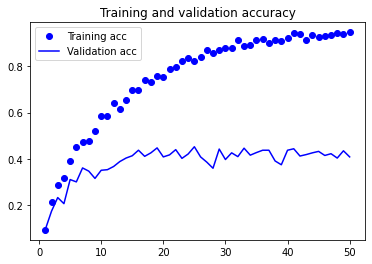

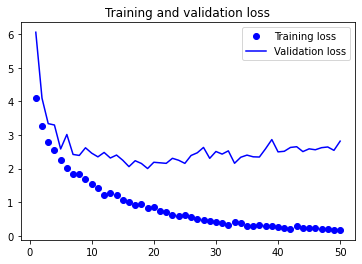

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.optimizers import RMSprop

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.05),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                                steps_per_epoch=50,
                                epochs=50, 
                                validation_data=validation_generator, 
                                validation_steps=50)

Epoch 1/50
50/50 [==============================] - 10s 207ms/step - loss: 7.1409 - accuracy: 0.0871 - val_loss: 13.3052 - val_accuracy: 0.0528
Epoch 2/50
50/50 [==============================] - 10s 199ms/step - loss: 3.6108 - accuracy: 0.1174 - val_loss: 10.8239 - val_accuracy: 0.0503
Epoch 3/50
50/50 [==============================] - 10s 203ms/step - loss: 3.5369 - accuracy: 0.1037 - val_loss: 22.2257 - val_accuracy: 0.0440
Epoch 4/50
50/50 [==============================] - 10s 204ms/step - loss: 3.4110 - accuracy: 0.1462 - val_loss: 15.7228 - val_accuracy: 0.0791
Epoch 5/50
50/50 [==============================] - 10s 200ms/step - loss: 3.4033 - accuracy: 0.1538 - val_loss: 5.8080 - val_accuracy: 0.1432
Epoch 6/50
50/50 [==============================] - 10s 197ms/step - loss: 3.2908 - accuracy: 0.1612 - val_loss: 260.6540 - val_accuracy: 0.0302
Epoch 7/50
50/50 [==============================] - 10s 198ms/step - loss: 3.0783 - accuracy: 0.2188 - val_loss: 4.6105 - val_accuracy: 

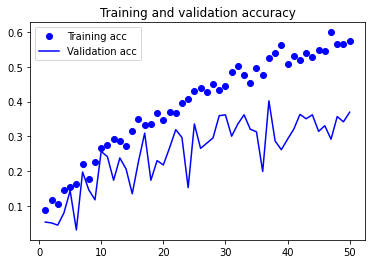

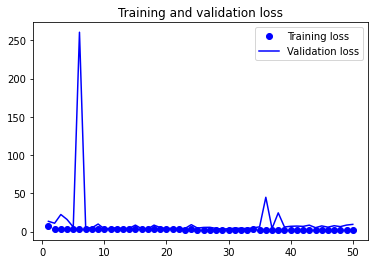

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
from keras.applications import VGG19

conv_base = VGG19(weights='imagenet', include_top=False,
                input_shape=(192, 192, 3))


conv_base.summary()

80142336/80134624 [==============================] - 3s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 192, 192, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 192, 192, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 192, 192, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 96, 96, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 96, 96, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 96, 96, 128)       147584    
______________________________________________________________

In [ ]:
conv_base.trainable = False

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', input_dim=6 * 6 * 512))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3)) 
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(30, activation='softmax'))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)
    

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)


train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size), 
        color_mode='rgb', 
        classes=None, 
        interpolation='hamming',
        class_mode='categorical', 
        batch_size=batch_size,
        shuffle=True)

validation_generator = test_datagen.flow_from_directory(
        validation_dir, 
        target_size=(image_size, image_size), 
        color_mode='rgb', 
        classes=None, 
        interpolation='hamming',
        class_mode='categorical', 
        batch_size=batch_size, 
        shuffle=False)

model.compile(loss='categorical_crossentropy',
              #optimizer=Adam(lr=0.001, decay=0, beta_1=0.9, beta_2=0.999),
              optimizer = 'rmsprop',
              metrics=['accuracy'])

Found 3640 images belonging to 30 classes.
Found 796 images belonging to 30 classes.


In [ ]:
history = model.fit(train_generator,
                                steps_per_epoch=50,
                                epochs=50, 
                                validation_data=validation_generator, 
                                validation_steps=50)

Epoch 1/50
50/50 [==============================] - 797s 16s/step - loss: 4.2216 - accuracy: 0.0821 - val_loss: 6.0941 - val_accuracy: 0.0905
Epoch 2/50
50/50 [==============================] - 321s 6s/step - loss: 3.2566 - accuracy: 0.1838 - val_loss: 4.8215 - val_accuracy: 0.1420
Epoch 3/50
50/50 [==============================] - 258s 5s/step - loss: 2.8985 - accuracy: 0.2500 - val_loss: 3.4805 - val_accuracy: 0.1972
Epoch 4/50
50/50 [==============================] - 191s 4s/step - loss: 2.5619 - accuracy: 0.2962 - val_loss: 3.6591 - val_accuracy: 0.1910
Epoch 5/50
50/50 [==============================] - 150s 3s/step - loss: 2.3946 - accuracy: 0.3447 - val_loss: 3.2697 - val_accuracy: 0.2362
Epoch 6/50
50/50 [==============================] - 124s 2s/step - loss: 2.1880 - accuracy: 0.4025 - val_loss: 2.8815 - val_accuracy: 0.2701
Epoch 7/50
50/50 [==============================] - 90s 2s/step - loss: 1.9797 - accuracy: 0.4343 - val_loss: 2.6440 - val_accuracy: 0.3015
Epoch 8/50
50

Epoch 1/50
50/50 [==============================] - 778s 16s/step - loss: 3655785021.2201 - accuracy: 0.0120 - val_loss: 4.7893 - val_accuracy: 0.0330

Epoch 2/50
50/50 [==============================] - 733s 15s/step - loss: 145.1259 - accuracy: 0.0070 - val_loss: 4.8185 - val_accuracy: 0.0000e+00

Epoch 3/50
50/50 [==============================] - 788s 16s/step - loss: 15.5342 - accuracy: 0.0080 - val_loss: 4.7991 - val_accuracy: 0.0000e+00

Epoch 4/50
50/50 [==============================] - 707s 14s/step - loss: 4.7877 - accuracy: 0.0050 - val_loss: 4.7963 - val_accuracy: 0.0265

Epoch 5/50
50/50 [==============================] - 757s 15s/step - loss: 83.0197 - accuracy: 0.0110 - val_loss: 4.8147 - val_accuracy: 0.0000e+00

Epoch 6/50
50/50 [==============================] - 793s 16s/step - loss: 5.0347 - accuracy: 0.0080 - val_loss: 4.7860 - val_accuracy: 0.0300

Epoch 7/50
50/50 [==============================] - 814s 16s/step - loss: 4.7851 - accuracy: 0.0080 - val_loss: 4.7890 - val_accuracy: 0.0387

Epoch 8/50
50/50 [==============================] - 786s 16s/step - loss: 4.7876 - accuracy: 0.0160 - val_loss: 4.8051 - val_accuracy: 0.0000e+00

Epoch 9/50
50/50 [==============================] - 671s 13s/step - loss: 4.7865 - accuracy: 0.0090 - val_loss: 4.7384 - val_accuracy: 0.0000e+00

Epoch 10/50
50/50 [==============================] - 660s 13s/step - loss: 4.7861 - accuracy: 0.0100 - val_loss: 4.8037 - val_accuracy: 0.0387

Epoch 11/50
50/50 [==============================] - 668s 13s/step - loss: 4.7875 - accuracy: 0.0070 - val_loss: 4.8237 - val_accuracy: 0.0000e+00

Epoch 12/50
50/50 [==============================] - 691s 14s/step - loss: 4.7853 - accuracy: 0.0100 - val_loss: 4.8210 - val_accuracy: 0.0000e+00

Epoch 13/50
50/50 [==============================] - 661s 13s/step - loss: 4.7858 - accuracy: 0.0130 - val_loss: 4.7448 - val_accuracy: 0.0000e+00

Epoch 14/50
50/50 [==============================] - 664s 13s/step - loss: 4.7869 - accuracy: 0.0080 - val_loss: 4.7589 - val_accuracy: 0.0000e+00

Epoch 15/50
50/50 [==============================] - 660s 13s/step - loss: 4.7859 - accuracy: 0.0070 - val_loss: 4.7449 - val_accuracy: 0.0000e+00

Epoch 16/50
50/50 [==============================] - 670s 13s/step - loss: 4.7834 - accuracy: 0.0090 - val_loss: 4.7287 - val_accuracy: 0.0387

Epoch 17/50
50/50 [==============================] - 659s 13s/step - loss: 4.7820 - accuracy: 0.0080 - val_loss: 4.7361 - val_accuracy: 0.0000e+00

Epoch 18/50
50/50 [==============================] - 669s 13s/step - loss: 4.7833 - accuracy: 0.0170 - val_loss: 4.8343 - val_accuracy: 0.0000e+00

Epoch 19/50
50/50 [==============================] - 661s 13s/step - loss: 4.7851 - accuracy: 0.0120 - val_loss: 4.7925 - val_accuracy: 0.0000e+00

Epoch 20/50
50/50 [==============================] - 661s 13s/step - loss: 4.7800 - accuracy: 0.0120 - val_loss: 4.8712 - val_accuracy: 0.0380

Epoch 21/50
50/50 [==============================] - 666s 13s/step - loss: 4.7822 - accuracy: 0.0070 - val_loss: 4.8462 - val_accuracy: 0.0000e+00

Epoch 22/50
50/50 [==============================] - 655s 13s/step - loss: 4.7848 - accuracy: 0.0110 - val_loss: 4.8039 - val_accuracy: 0.0000e+00

Epoch 23/50
50/50 [==============================] - 651s 13s/step - loss: 4.7825 - accuracy: 0.0160 - val_loss: 4.7827 - val_accuracy: 0.0387

Epoch 24/50
50/50 [==============================] - 657s 13s/step - loss: 4.7846 - accuracy: 0.0150 - val_loss: 4.9134 - val_accuracy: 0.0000e+00

Epoch 25/50
50/50 [==============================] - 658s 13s/step - loss: 4.7809 - accuracy: 0.0170 - val_loss: 4.6945 - val_accuracy: 0.0000e+00

Epoch 26/50
50/50 [==============================] - 661s 13s/step - loss: 4.7841 - accuracy: 0.0100 - val_loss: 4.6953 - val_accuracy: 0.0387

Epoch 27/50
50/50 [==============================] - 675s 14s/step - loss: 4.7800 - accuracy: 0.0121 - val_loss: 4.8812 - val_accuracy: 0.0000e+00

Epoch 28/50
50/50 [==============================] - 655s 13s/step - loss: 4.7864 - accuracy: 0.0100 - val_loss: 4.6395 - val_accuracy: 0.0000e+00

Epoch 29/50
50/50 [==============================] - 653s 13s/step - loss: 4.7796 - accuracy: 0.0110 - val_loss: 4.6433 - val_accuracy: 0.0387

Epoch 30/50
50/50 [==============================] - 653s 13s/step - loss: 4.7829 - accuracy: 0.0070 - val_loss: 4.8469 - val_accuracy: 0.0000e+00

Epoch 31/50
50/50 [==============================] - 653s 13s/step - loss: 4.7823 - accuracy: 0.0090 - val_loss: 4.7872 - val_accuracy: 0.0000e+00

Epoch 32/50
50/50 [==============================] - 650s 13s/step - loss: 4.7790 - accuracy: 0.0130 - val_loss: 4.7871 - val_accuracy: 0.0387

Epoch 33/50
50/50 [==============================] - 655s 13s/step - loss: 4.7822 - accuracy: 0.0160 - val_loss: 4.7261 - val_accuracy: 0.0000e+00

Epoch 34/50
50/50 [==============================] - 654s 13s/step - loss: 4.7810 - accuracy: 0.0120 - val_loss: 4.8707 - val_accuracy: 0.0000e+00

Epoch 35/50
50/50 [==============================] - 650s 13s/step - loss: 4.7812 - accuracy: 0.0110 - val_loss: 4.7540 - val_accuracy: 0.0387

Epoch 36/50
50/50 [==============================] - 654s 13s/step - loss: 4.7826 - accuracy: 0.0130 - val_loss: 4.7380 - val_accuracy: 0.0000e+00

Epoch 37/50
50/50 [==============================] - 652s 13s/step - loss: 4.7786 - accuracy: 0.0090 - val_loss: 4.8681 - val_accuracy: 0.0000e+00

Epoch 38/50
50/50 [==============================] - 647s 13s/step - loss: 4.7761 - accuracy: 0.0131 - val_loss: 4.4505 - val_accuracy: 0.0295

Epoch 39/50
50/50 [==============================] - 652s 13s/step - loss: 4.7849 - accuracy: 0.0060 - val_loss: 4.6830 - val_accuracy: 0.0090

Epoch 40/50
50/50 [==============================] - 653s 13s/step - loss: 4.7844 - accuracy: 0.0070 - val_loss: 4.8078 - val_accuracy: 0.0000e+00

Epoch 41/50
50/50 [==============================] - 651s 13s/step - loss: 4.7808 - accuracy: 0.0120 - val_loss: 4.8588 - val_accuracy: 0.0000e+00

Epoch 42/50
50/50 [==============================] - 647s 13s/step - loss: 4.7808 - accuracy: 0.0230 - val_loss: 4.7714 - val_accuracy: 0.0387

Epoch 43/50
50/50 [==============================] - 651s 13s/step - loss: 4.7852 - accuracy: 0.0080 - val_loss: 4.8828 - val_accuracy: 0.0000e+00

Epoch 44/50
50/50 [==============================] - 651s 13s/step - loss: 4.7774 - accuracy: 0.0110 - val_loss: 4.8677 - val_accuracy: 0.0000e+00

Epoch 45/50
50/50 [==============================] - 647s 13s/step - loss: 4.7772 - accuracy: 0.0140 - val_loss: 4.5100 - val_accuracy: 0.0387

Epoch 46/50
50/50 [==============================] - 654s 13s/step - loss: 4.7762 - accuracy: 0.0120 - val_loss: 4.9039 - val_accuracy: 0.0000e+00

Epoch 47/50
50/50 [==============================] - 652s 13s/step - loss: 4.7797 - accuracy: 0.0120 - val_loss: 4.6210 - val_accuracy: 0.0000e+00

Epoch 48/50
50/50 [==============================] - 649s 13s/step - loss: 4.7772 - accuracy: 0.0110 - val_loss: 4.7085 - val_accuracy: 0.0387

Epoch 49/50
50/50 [==============================] - 652s 13s/step - loss: 4.7795 - accuracy: 0.0160 - val_loss: 4.8322 - val_accuracy: 0.0000e+00

Epoch 50/50
50/50 [==============================] - 652s 13s/step - loss: 4.7808 - accuracy: 0.0150 - val_loss: 4.6877 - val_accuracy: 0.0000e+00

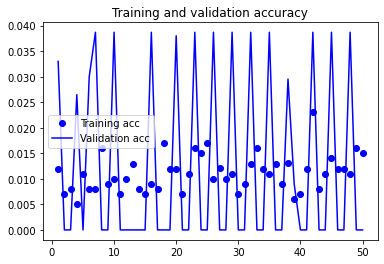